# Low-level image statistics in natural scenes influence perceptual decision-making - experiment 2


In [1]:
"""
Noor Seijdel, 2017
"""
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import os.path 
import statsmodels
from statsmodels.stats.anova import AnovaRM
from scipy.stats import pearsonr, percentileofscore, ttest_ind, ttest_ind_from_stats, ttest_rel, wilcoxon, ranksums
from statsmodels.sandbox.stats.multicomp import multipletests
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from patsy import center
%matplotlib inline 
from numpy.random import normal
statsmodels.__version__

'0.8.0.dev0+37f7e05'

## experiment 2a

In [2]:
data = pd.read_csv(u'/media/noor/DataNS/Onderzoek/Projects/Scenestats/SC_allparticipants.csv') 
data.head(10)

,Unnamed: 0,Pic,dier,Sc,lmh,SpAc,response,rt,subj_idx,CE,SC,CE_c,SC_c,CE_squared,SC_squared
0,0,88,nD,1,low,Sp,0,0.178,ppn10,1.178916,0.680473,0.084939,-0.243601,0.007215,0.059341
1,1,8,D,1,low,Sp,1,0.515,ppn10,1.011574,0.786179,-0.082402,-0.137895,0.006790,0.019015
2,2,95,nD,1,low,Sp,1,0.370,ppn10,0.972113,0.695830,-0.121864,-0.228245,0.014851,0.052096
3,3,74,D,1,low,Sp,0,0.369,ppn10,0.984104,0.606131,-0.109872,-0.317944,0.012072,0.101088
4,4,151,nD,1,low,Sp,1,0.376,ppn10,0.676819,0.691575,-0.417158,-0.232499,0.174020,0.054056
5,5,101,nD,1,low,Sp,0,0.397,ppn10,0.707316,0.593509,-0.386660,-0.330565,0.149506,0.109273
6,6,23,D,1,low,Sp,1,0.427,ppn10,0.804716,0.678708,-0.289261,-0.245366,0.083672,0.060205
7,7,125,nD,1,low,Sp,1,0.347,ppn10,0.997527,0.654655,-0.096450,-0.269419,0.009303,0.072587
8,8,68,D,1,low,Sp,0,0.469,ppn10,0.757161,0.706906,-0.336816,-0.217168,0.113445,0.047162
9,9,37,D,1,low,Sp,1,0.497,ppn10,1.088206,0.581132,-0.005770,-0.342942,0.000033,0.117609


In [3]:
# preprocessing 
data2use = data[data['rt']>0.1] # remove fast guesses - rt < 100 ms)
data4rt = data2use[data2use['response'] == 1]# remove error trials for RT analysis (correct = 1, error = 0)
data4rt['rt'] = data4rt['rt'].apply(pd.to_numeric)*1000 #RT in ms

In [4]:
#RTs - repeated measures ANOVA with complexity (low, med, high) and instruction (speed, accurate)
means = data4rt.groupby(['subj_idx', 'Sc', 'SpAc'], as_index=False)['rt'].mean()
means['rt'] = means['rt'].round(3) 
df = pd.DataFrame(means)
aovrm = AnovaRM(df, 'rt', 'subj_idx', within=['Sc', 'SpAc'])
fit = aovrm.fit()
print fit
p_eta_s = [] #compute partial eta squared 
p_eta_s.append((fit.anova_table['F Value'][0]*fit.anova_table['Num DF'][0])/((fit.anova_table['F Value'][0]*fit.anova_table['Num DF'][0])+fit.anova_table['Den DF'][0]))
p_eta_s.append((fit.anova_table['F Value'][1]*fit.anova_table['Num DF'][1])/((fit.anova_table['F Value'][1]*fit.anova_table['Num DF'][1])+fit.anova_table['Den DF'][1]))
p_eta_s.append((fit.anova_table['F Value'][2]*fit.anova_table['Num DF'][2])/((fit.anova_table['F Value'][2]*fit.anova_table['Num DF'][2])+fit.anova_table['Den DF'][2]))
print 'p_eta_s = ', p_eta_s

                Anova
        F Value Num DF  Den DF Pr > F
-------------------------------------
Sc       0.5120 2.0000 44.0000 0.6028
SpAc    54.0073 1.0000 22.0000 0.0000
Sc:SpAc  3.8708 2.0000 44.0000 0.0283

p_eta_s =  [0.022742046102890219, 0.71055395094586005, 0.14961950433142826]


In [5]:
#Error rates repeated measures ANOVA with complexity (low, med, high) and instruction (speed, accurate)
totalT = data2use.groupby(['subj_idx', 'Sc', 'SpAc'], as_index=False)['response'].count()
correctT = data2use.groupby(['subj_idx', 'Sc', 'SpAc'], as_index=False)['response'].sum()
totalT['response'] = (1-(correctT['response']/totalT['response'].round(3)))*100

df = pd.DataFrame(totalT)
aovrm = AnovaRM(df, 'response', 'subj_idx', within=['Sc', 'SpAc'])
fit = aovrm.fit()
print fit
p_eta_s = [] #compute partial eta squared 
p_eta_s.append((fit.anova_table['F Value'][0]*fit.anova_table['Num DF'][0])/((fit.anova_table['F Value'][0]*fit.anova_table['Num DF'][0])+fit.anova_table['Den DF'][0]))
p_eta_s.append((fit.anova_table['F Value'][1]*fit.anova_table['Num DF'][1])/((fit.anova_table['F Value'][1]*fit.anova_table['Num DF'][1])+fit.anova_table['Den DF'][1]))
p_eta_s.append((fit.anova_table['F Value'][2]*fit.anova_table['Num DF'][2])/((fit.anova_table['F Value'][2]*fit.anova_table['Num DF'][2])+fit.anova_table['Den DF'][2]))
print 'p_eta_s = ', p_eta_s

                Anova
        F Value Num DF  Den DF Pr > F
-------------------------------------
Sc       8.3008 2.0000 44.0000 0.0009
SpAc    36.6855 1.0000 22.0000 0.0000
Sc:SpAc  4.3514 2.0000 44.0000 0.0189

p_eta_s =  [0.2739470011727041, 0.62512018060780361, 0.16512916393523097]


### Interaction effect: we analyze speed and accurate trials separately

              Anova
   F Value Num DF  Den DF Pr > F
--------------------------------
Sc  0.9912 2.0000 44.0000 0.3793

p_eta_s =  [0.043112154910165693]
              Anova
   F Value Num DF  Den DF Pr > F
--------------------------------
Sc  2.3833 2.0000 44.0000 0.1041

p_eta_s =  [0.09774319253822801]


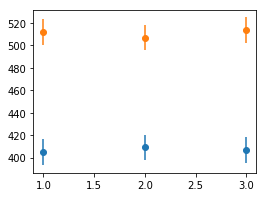

In [6]:
#RTs
meanSp = means[means['SpAc']=='Sp']
meanAc = means[means['SpAc']== 'Ac']

df = pd.DataFrame(meanSp)
aovrm = AnovaRM(df, 'rt', 'subj_idx', within=['Sc'])
fit = aovrm.fit()
print fit
p_eta_s = [] #compute partial eta squared 
p_eta_s.append((fit.anova_table['F Value'][0]*fit.anova_table['Num DF'][0])/((fit.anova_table['F Value'][0]*fit.anova_table['Num DF'][0])+fit.anova_table['Den DF'][0]))
print 'p_eta_s = ', p_eta_s

df = pd.DataFrame(meanAc)
aovrm = AnovaRM(df, 'rt', 'subj_idx', within=['Sc'])
fit = aovrm.fit()
print fit
p_eta_s = [] #compute partial eta squared 
p_eta_s.append((fit.anova_table['F Value'][0]*fit.anova_table['Num DF'][0])/((fit.anova_table['F Value'][0]*fit.anova_table['Num DF'][0])+fit.anova_table['Den DF'][0]))
print 'p_eta_s = ', p_eta_s

fig = plt.figure(figsize =(4,3))
ax0 = plt.errorbar([1,2,3],meanSp.groupby('Sc')['rt'].mean(), yerr=means.groupby('Sc')['rt'].sem(), fmt='o')
ax1 = plt.errorbar([1,2,3],meanAc.groupby('Sc')['rt'].mean(), yerr=means.groupby('Sc')['rt'].sem(), fmt='o')

              Anova
   F Value Num DF  Den DF Pr > F
--------------------------------
Sc  9.1893 2.0000 44.0000 0.0005

p_eta_s =  [0.29462910481863547]
              Anova
   F Value Num DF  Den DF Pr > F
--------------------------------
Sc  1.6139 2.0000 44.0000 0.2107

p_eta_s =  [0.068344423806651747]


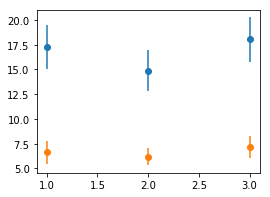

In [7]:
#Error rates
totalT = data2use.groupby(['subj_idx', 'Sc','SpAc'], as_index=False)['response'].count()
correctT = data2use.groupby(['subj_idx', 'Sc','SpAc'], as_index=False)['response'].sum()
totalT['response'] = (1-(correctT['response']/totalT['response'].round(3)))*100

meanSp = totalT[totalT['SpAc']=='Sp']
meanAc = totalT[totalT['SpAc']== 'Ac']

df = pd.DataFrame(meanSp)
aovrm = AnovaRM(df, 'response', 'subj_idx', within=['Sc'])
fit = aovrm.fit()
print fit
p_eta_s = [] #compute partial eta squared 
p_eta_s.append((fit.anova_table['F Value'][0]*fit.anova_table['Num DF'][0])/((fit.anova_table['F Value'][0]*fit.anova_table['Num DF'][0])+fit.anova_table['Den DF'][0]))
print 'p_eta_s = ', p_eta_s

df = pd.DataFrame(meanAc)
aovrm = AnovaRM(df, 'response', 'subj_idx', within=['Sc'])
fit = aovrm.fit()
print fit
p_eta_s = [] #compute partial eta squared 
p_eta_s.append((fit.anova_table['F Value'][0]*fit.anova_table['Num DF'][0])/((fit.anova_table['F Value'][0]*fit.anova_table['Num DF'][0])+fit.anova_table['Den DF'][0]))
print 'p_eta_s = ', p_eta_s

fig = plt.figure(figsize =(4,3))
ax0 = plt.errorbar([1,2,3],meanSp.groupby('Sc')['response'].mean(), yerr=meanSp.groupby('Sc')['response'].sem(), fmt='o')
ax1 = plt.errorbar([1,2,3],meanAc.groupby('Sc')['response'].mean(), yerr=meanAc.groupby('Sc')['response'].sem(), fmt='o')

In [8]:
low_vs_med_speed = ttest_rel(meanSp[meanSp['Sc'] == 1]['response'], meanSp[meanSp['Sc'] == 2]['response'])
low_vs_high_speed = ttest_rel(meanSp[meanSp['Sc'] == 1]['response'], meanSp[meanSp['Sc'] == 3]['response'])
med_vs_high_speed = ttest_rel(meanSp[meanSp['Sc'] == 2]['response'], meanSp[meanSp['Sc'] == 3]['response'])
#stats =[low_vs_med_speed[1], low_vs_high_speed[1], med_vs_high_speed[1]]
print "low-med RT speed - t-stat = %.3f; p-val = %.3f." % low_vs_med_speed
print "low-high RT speed - t-stat = %.3f; p-val = %.3f." % low_vs_high_speed
print "med-high RT speed - t-stat = %.3f; p-val = %.3f." % med_vs_high_speed

low_vs_med_acc = ttest_rel(meanAc[meanAc['Sc'] == 1]['response'], meanAc[meanAc['Sc'] == 2]['response'])
low_vs_high_acc = ttest_rel(meanAc[meanAc['Sc'] == 1]['response'], meanAc[meanAc['Sc'] == 3]['response'])
med_vs_high_acc = ttest_rel(meanAc[meanAc['Sc'] == 2]['response'], meanAc[meanAc['Sc'] == 3]['response'])
print "low-med RT acc - t-stat = %.3f; p-val = %.3f." % low_vs_med_acc
print "low-high RT acc - t-stat = %.3f; p-val = %.3f." % low_vs_high_acc
print "med-high RT acc - t-stat = %.3f; p-val = %.3f." % med_vs_high_acc

stats =[low_vs_med_speed[1], low_vs_high_speed[1], med_vs_high_speed[1],low_vs_med_acc[1], low_vs_high_acc[1], med_vs_high_acc[1]]
from statsmodels.sandbox.stats.multicomp import multipletests
p_adjusted = multipletests(stats, method='bonferroni')
print p_adjusted

low-med RT speed - t-stat = 3.294; p-val = 0.003.
low-high RT speed - t-stat = -0.917; p-val = 0.369.
med-high RT speed - t-stat = -4.346; p-val = 0.000.
low-med RT acc - t-stat = 0.914; p-val = 0.371.
low-high RT acc - t-stat = -0.936; p-val = 0.359.
med-high RT acc - t-stat = -1.702; p-val = 0.103.
(array([ True, False,  True, False, False, False], dtype=bool), array([ 0.01983671,  1.        ,  0.00155303,  1.        ,  1.        ,
        0.61680411]), 0.008512444610847103, 0.008333333333333333)


## experiment 2b

In [9]:
data = pd.read_csv(u'/media/noor/DataNS/Onderzoek/Projects/Scenestats/CE_allparticipants.csv') 
data.head(10)

,Unnamed: 0,Pic,dier,Sc,SpAc,response,rt,subj_idx,CE,SC,CE_c,SC_c,CE_squared,SC_squared
0,0,152,nD,1,Sp,1,0.482,ppn11,0.097535,0.754800,-0.099572,-0.150386,0.009915,0.022616
1,1,95,nD,1,Sp,1,0.573,ppn11,0.108732,0.837318,-0.088375,-0.067869,0.007810,0.004606
2,2,148,nD,1,Sp,1,0.278,ppn11,0.122933,0.823836,-0.074174,-0.081350,0.005502,0.006618
3,3,43,D,1,Sp,0,0.324,ppn11,0.099009,0.728622,-0.098097,-0.176564,0.009623,0.031175
4,4,25,D,1,Sp,0,0.290,ppn11,0.111710,0.945036,-0.085397,0.039850,0.007293,0.001588
5,5,84,nD,1,Sp,1,0.432,ppn11,0.105532,0.850777,-0.091575,-0.054409,0.008386,0.002960
6,6,21,D,1,Sp,1,0.445,ppn11,0.133582,1.004762,-0.063525,0.099576,0.004035,0.009915
7,7,65,D,1,Sp,1,0.365,ppn11,0.131936,0.782202,-0.065170,-0.122984,0.004247,0.015125
8,8,101,nD,1,Sp,1,0.493,ppn11,0.108600,0.820821,-0.088507,-0.084365,0.007833,0.007117
9,9,151,nD,1,Sp,1,0.432,ppn11,0.125546,0.912168,-0.071561,0.006982,0.005121,0.000049


In [10]:
# preprocessing 
data2use = data[data['rt']>0.1] # remove fast guesses - rt < 100 ms)
data4rt = data2use[data2use['response'] == 1]# remove error trials for RT analysis (correct = 1, error = 0)
data4rt['rt'] = data4rt['rt'].apply(pd.to_numeric)*1000 #RT in ms

In [11]:
#RTs - repeated measures ANOVA with complexity (low, med, high) and instruction (speed, accurate)
means = data4rt.groupby(['subj_idx', 'Sc', 'SpAc'], as_index=False)['rt'].mean()
means['rt'] = means['rt'].round(3) 
df = pd.DataFrame(means)
aovrm = AnovaRM(df, 'rt', 'subj_idx', within=['Sc', 'SpAc'])
fit = aovrm.fit()
print fit
p_eta_s = [] #compute partial eta squared 
p_eta_s.append((fit.anova_table['F Value'][0]*fit.anova_table['Num DF'][0])/((fit.anova_table['F Value'][0]*fit.anova_table['Num DF'][0])+fit.anova_table['Den DF'][0]))
p_eta_s.append((fit.anova_table['F Value'][1]*fit.anova_table['Num DF'][1])/((fit.anova_table['F Value'][1]*fit.anova_table['Num DF'][1])+fit.anova_table['Den DF'][1]))
p_eta_s.append((fit.anova_table['F Value'][2]*fit.anova_table['Num DF'][2])/((fit.anova_table['F Value'][2]*fit.anova_table['Num DF'][2])+fit.anova_table['Den DF'][2]))
print 'p_eta_s = ', p_eta_s

                Anova
        F Value Num DF  Den DF Pr > F
-------------------------------------
Sc       1.7401 2.0000 48.0000 0.1864
SpAc    69.0419 1.0000 24.0000 0.0000
Sc:SpAc  0.1225 2.0000 48.0000 0.8850

p_eta_s =  [0.067601496786276347, 0.74205170465493764, 0.0050784221711344668]


In [12]:
#Error rates repeated measures ANOVA with complexity (low, med, high) and instruction (speed, accurate)
totalT = data2use.groupby(['subj_idx', 'Sc', 'SpAc'], as_index=False)['response'].count()
correctT = data2use.groupby(['subj_idx', 'Sc', 'SpAc'], as_index=False)['response'].sum()
totalT['response'] = (1-(correctT['response']/totalT['response'].round(3)))*100

df = pd.DataFrame(totalT)
aovrm = AnovaRM(df, 'response', 'subj_idx', within=['Sc', 'SpAc'])
fit = aovrm.fit()
print fit
p_eta_s = [] #compute partial eta squared 
p_eta_s.append((fit.anova_table['F Value'][0]*fit.anova_table['Num DF'][0])/((fit.anova_table['F Value'][0]*fit.anova_table['Num DF'][0])+fit.anova_table['Den DF'][0]))
p_eta_s.append((fit.anova_table['F Value'][1]*fit.anova_table['Num DF'][1])/((fit.anova_table['F Value'][1]*fit.anova_table['Num DF'][1])+fit.anova_table['Den DF'][1]))
p_eta_s.append((fit.anova_table['F Value'][2]*fit.anova_table['Num DF'][2])/((fit.anova_table['F Value'][2]*fit.anova_table['Num DF'][2])+fit.anova_table['Den DF'][2]))
print 'p_eta_s = ', p_eta_s

                Anova
        F Value Num DF  Den DF Pr > F
-------------------------------------
Sc       1.0613 2.0000 48.0000 0.3540
SpAc    58.4973 1.0000 24.0000 0.0000
Sc:SpAc  1.1972 2.0000 48.0000 0.3109

p_eta_s =  [0.042347093071532838, 0.70908125666495792, 0.047514088453435133]


### No interaction effect

              Anova
   F Value Num DF  Den DF Pr > F
--------------------------------
Sc  1.7995 2.0000 48.0000 0.1764

p_eta_s =  [0.069749039750737166]


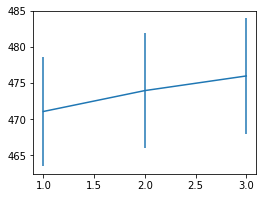

In [13]:
#RTs - collapse over Speed-Accurate (because no interaction effect)
means = data4rt.groupby(['subj_idx', 'Sc'], as_index=False)['rt'].mean()
means['rt'] = means['rt'].round(3)

df = pd.DataFrame(means)
aovrm = AnovaRM(df, 'rt', 'subj_idx', within=['Sc'])
fit = aovrm.fit()
print fit
p_eta_s = [] #compute partial eta squared 
p_eta_s.append((fit.anova_table['F Value'][0]*fit.anova_table['Num DF'][0])/((fit.anova_table['F Value'][0]*fit.anova_table['Num DF'][0])+fit.anova_table['Den DF'][0]))
print 'p_eta_s = ', p_eta_s

fig = plt.figure(figsize =(4,3))
ax = plt.errorbar([1,2,3],means.groupby('Sc')['rt'].mean(), means.groupby('Sc')['rt'].sem())

              Anova
   F Value Num DF  Den DF Pr > F
--------------------------------
Sc  1.1672 2.0000 48.0000 0.3199

p_eta_s =  [0.04637930617664341]


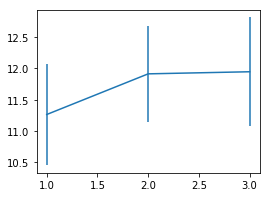

In [14]:
#Error rates collapse over Speed-Accurate (because no interaction effect)
totalT = data2use.groupby(['subj_idx', 'Sc'], as_index=False)['response'].count()
correctT = data2use.groupby(['subj_idx', 'Sc'], as_index=False)['response'].sum()
totalT['response'] = (1-(correctT['response']/totalT['response'].round(3)))*100

df = pd.DataFrame(totalT)
aovrm = AnovaRM(df, 'response', 'subj_idx', within=['Sc'])
fit = aovrm.fit()
print fit
p_eta_s = [] #compute partial eta squared 
p_eta_s.append((fit.anova_table['F Value'][0]*fit.anova_table['Num DF'][0])/((fit.anova_table['F Value'][0]*fit.anova_table['Num DF'][0])+fit.anova_table['Den DF'][0]))
print 'p_eta_s = ', p_eta_s

fig = plt.figure(figsize =(4,3))
ax = plt.errorbar([1,2,3],totalT.groupby('Sc')['response'].mean(), totalT.groupby('Sc')['response'].sem())